In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('"D:\Download\LP-IV-datasets (1)\LP-IV-datasets\CIFR(Ass2&3)\test_data.csv"')

OSError: [Errno 22] Invalid argument: '"D:\\Download\\LP-IV-datasets (1)\\LP-IV-datasets\\CIFR(Ass2&3)\test_data.csv"'

In [3]:
y_train = df['label'].values

In [4]:
x_train=df.drop('label',axis=1).values

In [5]:
x_train = x_train.reshape((-1,32,32,3)).astype('float32')
x_train =x_train/255

In [6]:
df1 = pd.read_csv('CIFR/test.csv')

In [7]:
x_test = df1.values.reshape((-1,32,32,3)).astype('float32')
x_test = x_test/255

In [8]:
model = models.Sequential([
    layers.Conv2D(32,kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(200,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 200)               1440200   
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 200)               0

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 78s 48ms/step - loss: 1.5025 - accuracy: 0.4763
Epoch 2/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2927 - accuracy: 0.5522
Epoch 3/15
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2364 - accuracy: 0.5727
Epoch 4/15
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1630 - accuracy: 0.5996
Epoch 5/15
1563/1563 [==============================] - 70s 44ms/step - loss: 1.1200 - accuracy: 0.6137
Epoch 6/15
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0705 - accuracy: 0.6297
Epoch 7/15
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0392 - accuracy: 0.6408
Epoch 8/15
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9884 - accuracy: 0.6600
Epoch 9/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9415 - accuracy: 0.6724
Epoch 10/15
1563/1563 [==============================] - 71s 45m

In [ ]:
predict = model.predict(x_test)

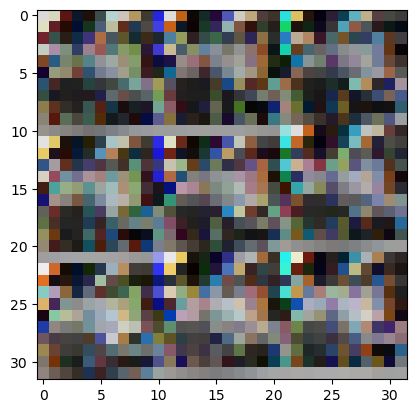

In [32]:
n = random.randint(0,999)
image = x_train[n]
plt.imshow(np.squeeze(image))
plt.show()

In [33]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict = model.predict([image])
print("Predicted Class: {}".format(np.argmax(predict)))

1/1 [==============================] - 0s 17ms/step
Predicted Class: 1


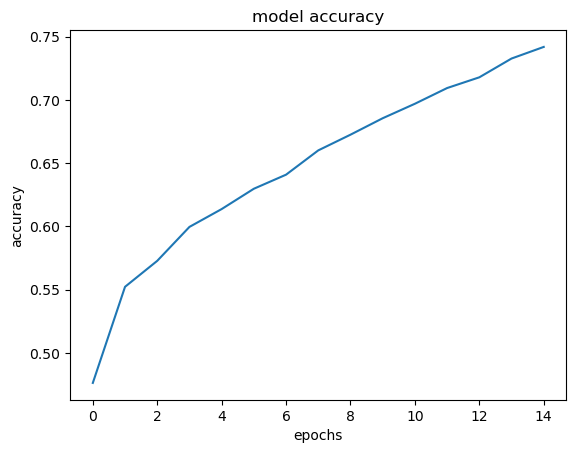

In [34]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()

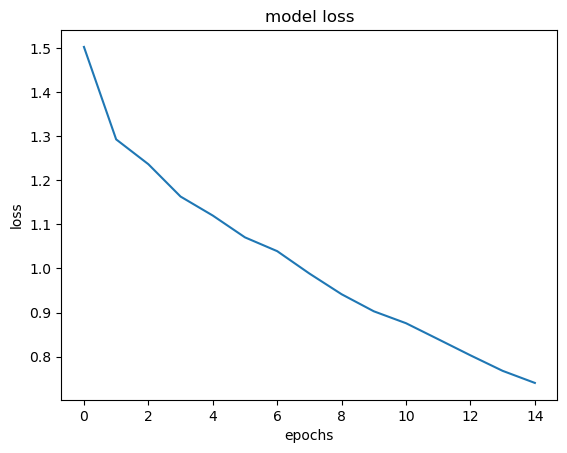

In [35]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model loss')
plt.show()